<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Polynome" data-toc-modified-id="Polynome-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polynome</a></span></li><li><span><a href="#Loesen-von-Gleichungen-(solve)" data-toc-modified-id="Loesen-von-Gleichungen-(solve)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loesen von Gleichungen (solve)</a></span></li><li><span><a href="#Wurzeln-von-Polynomen" data-toc-modified-id="Wurzeln-von-Polynomen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wurzeln von Polynomen</a></span></li><li><span><a href="#Numerische-Loesung-nichtlinearer-Gleichungen" data-toc-modified-id="Numerische-Loesung-nichtlinearer-Gleichungen-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Numerische Loesung nichtlinearer Gleichungen</a></span></li></ul></div>

# Lektion 6

In [1]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
#%matplotlib inline
x,y,z,a,b,c,d = symbols('x y z a b c d')

## Polynome

In [2]:
p = 2*x**2 + 3
q = x+1
d,r = div(p,q)
d,r

In [3]:
q = x+y**2
p = 1
degree(q,x), degree(q,y), degree(q) #, degree(p)

besser

In [4]:
p = poly(2*x+y**2,domain=QQ)
p

In [5]:
q = poly(0,x,domain=QQ)
#q = poly(1,x,domain=QQ)
q

In [6]:
degree(q) # Achtung

## Loesen von Gleichungen (solve)

In [7]:
gl = Eq((x-1)**2,4-x)
gl

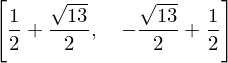

In [8]:
lsg = solve(gl,x)
lsg

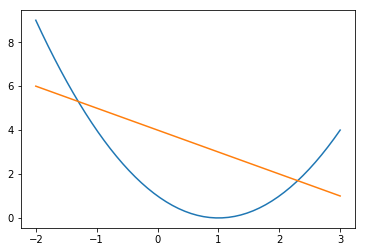

In [9]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-2,3)
ax.plot(xn,lambdify(x,gl.lhs)(xn))
ax.plot(xn,lambdify(x,gl.rhs)(xn))
plt.show()

In [10]:
gl.subs(x,lsg[0])

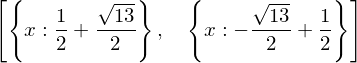

In [11]:
lsg = solve({gl})
lsg

In [12]:
gl.subs(x,lsg[0][x])

In [13]:
gl.subs(lsg[0])

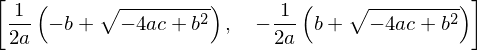

In [14]:
solve(a*x**2+b*x+c,x)

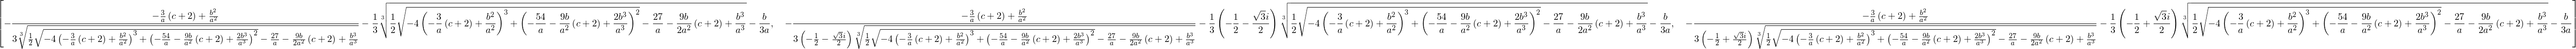

In [15]:
sol = solve(a*x**3+b*x**2+c*x+d,x) #Cardano
sol

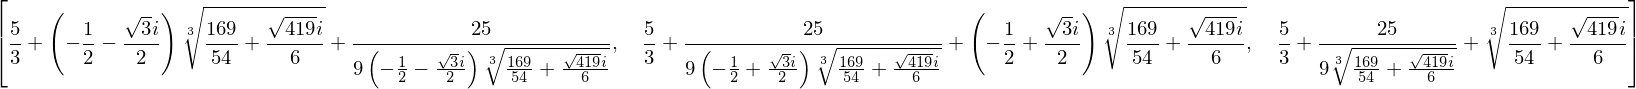

In [16]:
p = Eq(x**3-5*x**2+3,0)
Lsg = solve(p)
Lsg

In [17]:
[l.n() for l in Lsg]

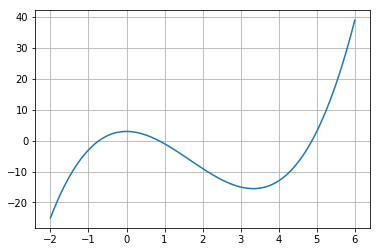

In [18]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-2,6,100)
ax.plot(xn,lambdify(x,p.lhs)(xn))
ax.grid()

## Wurzeln von Polynomen

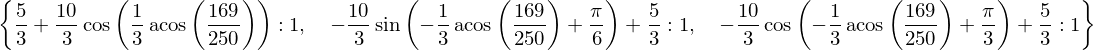

In [19]:
wurzeln = roots(p,trig=True)
wurzeln

In [20]:
[l.n() for l in Lsg], [w.n() for w in wurzeln ]

In [21]:
[p.subs(x,l).simplify() for l in Lsg]

In [22]:
[p.subs(x,w).expand(trig=True).trigsimp() for w in wurzeln]

[-1.59615467600863 + 5.48401685356915e-31*I, 1.51572158929134 + 2.67884293265673e-30*I, 2.26307741031324 - 1.54330069972334e-30*I, -0.182644323595948 - 1.6839439182903e-30*I]


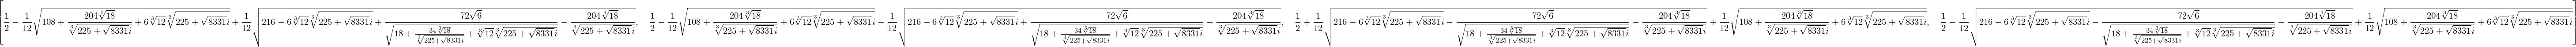

In [23]:
q = Eq(1*x**4-2*x**3-3*x**2+5*x+1,0) 
sol = solve(q,x)
print([l.n() for l in sol])
[w.simplify() for w in roots(q)]

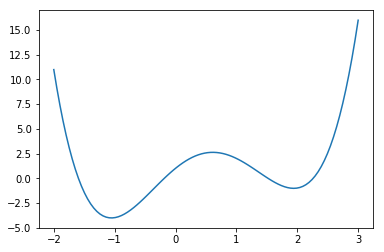

In [24]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-2,3,100)
ax.plot(xn,lambdify(x,q.lhs)(xn))

In [25]:
lsg = solve(x**5-x-11) # -> Algebra
lsg

In [26]:
[l.n() for l in lsg]

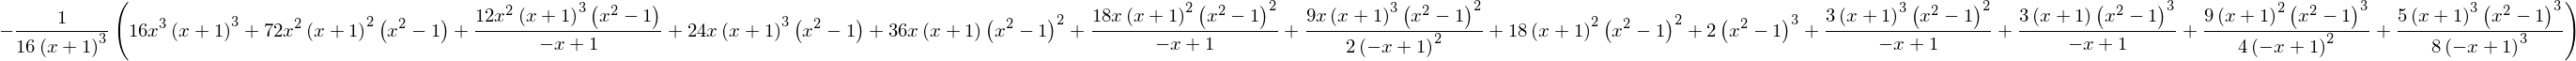

In [27]:
n= int(3)
a=Rational(-1,2)
b=3
f = 1/(2**n*factorial(n)) *(1-x)**(-a) *(1+x)**(-b) * diff((1-x)**a * (1+x)**b * (1-x**2)**n,x,n)
f
#f.simplify()
#plot(f,(x,-1/2,3/2))

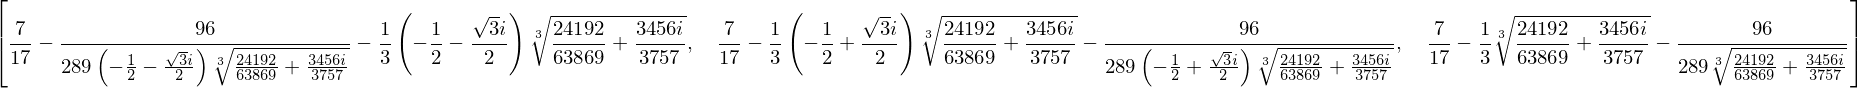

In [28]:
sols = solve(f.simplify())
sols

In [29]:
[im(sol).simplify() for sol in sols]

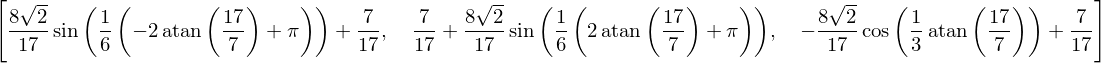

In [30]:
[re(sol).simplify() for sol in sols]

In [31]:
gl = Eq(sin(x),cos(x))
gl

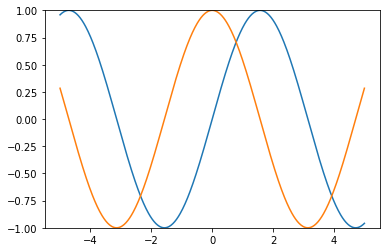

In [32]:
def glp(lb,ub,gl,nn=500):
    fig = plt.figure()
    ax = fig.gca()
    xn = np.linspace(lb,ub,nn)
    ax.plot(xn,lambdify(x,gl.lhs)(xn))
    ax.plot(xn,lambdify(x,gl.rhs)(xn))
    #plt.show()
    return fig, ax
fig, ax = glp(-5,5,gl)
ax.set_ylim((-1,1));

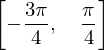

In [33]:
solve(gl,x)

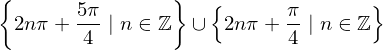

In [34]:
solveset(gl,x)

In [35]:
solveset(exp(x),x) # exp(x) == 0

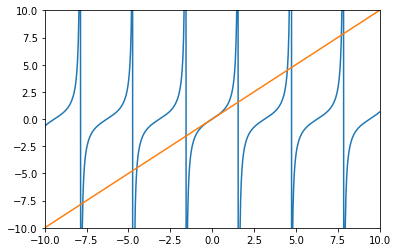

In [36]:
gl = Eq(tan(x),x)
fig, ax = glp(-10,10,gl)
ax.set_ylim([-10,10])
ax.axis([-10,10,-10,10])

In [37]:
solveset(gl)

## Numerische Loesung nichtlinearer Gleichungen

In [38]:
nsolve(gl,1)

In [39]:
nsolve(gl,(np.pi, 1.499*np.pi),solver='bisect')